In [1]:
import netCDF4 as nc
import numpy as np
import matplotlib.pyplot as plt
import os
import pathlib, glob
import cartopy.crs as ccrs
from scipy.signal import savgol_filter
import string
from cartopy.util import add_cyclic_point
from matplotlib import colors

%run ./get_fixed_variables.ipynb # load plotting functions and fixed vars

In [2]:
## load surface temperature [K]
FSNS_8xco2_strato = np.load('/glade/campaign/univ/uhar0013/asalazar/saved_data/FSNS_8xco2_strato.npy')
FSNS_8xco2_nostrato = np.load('/glade/campaign/univ/uhar0013/asalazar/saved_data/FSNS_8xco2_nostrato.npy')
FSNS_1xco2_strato = np.load('/glade/campaign/univ/uhar0013/asalazar/saved_data/FSNS_PI_strato.npy')
FSNS_1xco2_nostrato = np.load('/glade/campaign/univ/uhar0013/asalazar/saved_data/FSNS_PI_nostrato.npy')


FLNS_8xco2_strato = np.load('/glade/campaign/univ/uhar0013/asalazar/saved_data/FLNS_8xco2_strato.npy')
FLNS_8xco2_nostrato = np.load('/glade/campaign/univ/uhar0013/asalazar/saved_data/FLNS_8xco2_nostrato.npy')
FLNS_1xco2_strato = np.load('/glade/campaign/univ/uhar0013/asalazar/saved_data/FLNS_PI_strato.npy')
FLNS_1xco2_nostrato = np.load('/glade/campaign/univ/uhar0013/asalazar/saved_data/FLNS_PI_nostrato.npy')


LHFLX_8xco2_strato = np.load('/glade/campaign/univ/uhar0013/asalazar/saved_data/LHFLX_8xco2_strato.npy')
LHFLX_8xco2_nostrato = np.load('/glade/campaign/univ/uhar0013/asalazar/saved_data/LHFLX_8xco2_nostrato.npy')
LHFLX_1xco2_strato = np.load('/glade/campaign/univ/uhar0013/asalazar/saved_data/LHFLX_PI_strato.npy')
LHFLX_1xco2_nostrato = np.load('/glade/campaign/univ/uhar0013/asalazar/saved_data/LHFLX_PI_nostrato.npy')



SHFLX_8xco2_strato = np.load('/glade/campaign/univ/uhar0013/asalazar/saved_data/SHFLX_8xco2_strato.npy')
SHFLX_8xco2_nostrato = np.load('/glade/campaign/univ/uhar0013/asalazar/saved_data/SHFLX_8xco2_nostrato.npy')
SHFLX_1xco2_strato = np.load('/glade/campaign/univ/uhar0013/asalazar/saved_data/SHFLX_PI_strato.npy')
SHFLX_1xco2_nostrato = np.load('/glade/campaign/univ/uhar0013/asalazar/saved_data/SHFLX_PI_nostrato.npy')


In [3]:
## compute zonal average for each cloud-locking simulation
FSNSzonal_8xco2_nostrato = np.nanmean(FSNS_8xco2_nostrato*nonstrato_mask_plot, axis = -1)
FSNSzonal_8xco2_strato = np.nanmean(FSNS_8xco2_strato*nonstrato_mask_plot, axis = -1)
FSNSzonal_1xco2_nostrato = np.nanmean(FSNS_1xco2_nostrato*nonstrato_mask_plot, axis = -1)
FSNSzonal_1xco2_strato = np.nanmean(FSNS_1xco2_strato*nonstrato_mask_plot, axis = -1)

FLNSzonal_8xco2_nostrato = np.nanmean(FLNS_8xco2_nostrato*nonstrato_mask_plot, axis = -1)
FLNSzonal_8xco2_strato = np.nanmean(FLNS_8xco2_strato*nonstrato_mask_plot, axis = -1)
FLNSzonal_1xco2_nostrato = np.nanmean(FLNS_1xco2_nostrato*nonstrato_mask_plot, axis = -1)
FLNSzonal_1xco2_strato = np.nanmean(FLNS_1xco2_strato*nonstrato_mask_plot, axis = -1)

LHFLXzonal_8xco2_nostrato = np.nanmean(LHFLX_8xco2_nostrato*nonstrato_mask_plot, axis = -1)
LHFLXzonal_8xco2_strato = np.nanmean(LHFLX_8xco2_strato*nonstrato_mask_plot, axis = -1)
LHFLXzonal_1xco2_nostrato = np.nanmean(LHFLX_1xco2_nostrato*nonstrato_mask_plot, axis = -1)
LHFLXzonal_1xco2_strato = np.nanmean(LHFLX_1xco2_strato*nonstrato_mask_plot, axis = -1)

SHFLXzonal_8xco2_nostrato = np.nanmean(SHFLX_8xco2_nostrato*nonstrato_mask_plot, axis = -1)
SHFLXzonal_8xco2_strato = np.nanmean(SHFLX_8xco2_strato*nonstrato_mask_plot, axis = -1)
SHFLXzonal_1xco2_nostrato = np.nanmean(SHFLX_1xco2_nostrato*nonstrato_mask_plot, axis = -1)
SHFLXzonal_1xco2_strato = np.nanmean(SHFLX_1xco2_strato*nonstrato_mask_plot, axis = -1)

/glade/derecho/scratch/asalazar/tmp/ipykernel_37602/3721108563.py:16: RuntimeWarning: Mean of empty slice
  def yearly_avg(x, year_range): return(np.nanmean(x[-12*year_range:], axis =0 ))
/glade/derecho/scratch/asalazar/tmp/ipykernel_37602/3943281101.py:31: RuntimeWarning: Mean of empty slice
  FLNS_diff_8xco2_land =np.nanmean(yearly_avg(FLNS_8xco2_nostrato*LANDMASK,year_to_avg),axis=-1)-np.nanmean(yearly_avg(FLNS_8xco2_strato*LANDMASK,year_to_avg), axis = -1) # difference only over land
/glade/derecho/scratch/asalazar/tmp/ipykernel_37602/3943281101.py:32: RuntimeWarning: Mean of empty slice
  FSNS_diff_8xco2_land =np.nanmean(yearly_avg(FSNS_8xco2_nostrato*LANDMASK,year_to_avg),axis=-1)-np.nanmean(yearly_avg(FSNS_8xco2_strato*LANDMASK,year_to_avg), axis = -1) # difference only over land
/glade/derecho/scratch/asalazar/tmp/ipykernel_37602/3943281101.py:33: RuntimeWarning: Mean of empty slice
  SHFLX_diff_8xco2_land =np.nanmean(yearly_avg(SHFLX_8xco2_nostrato*LANDMASK,year_to_avg),axis=-

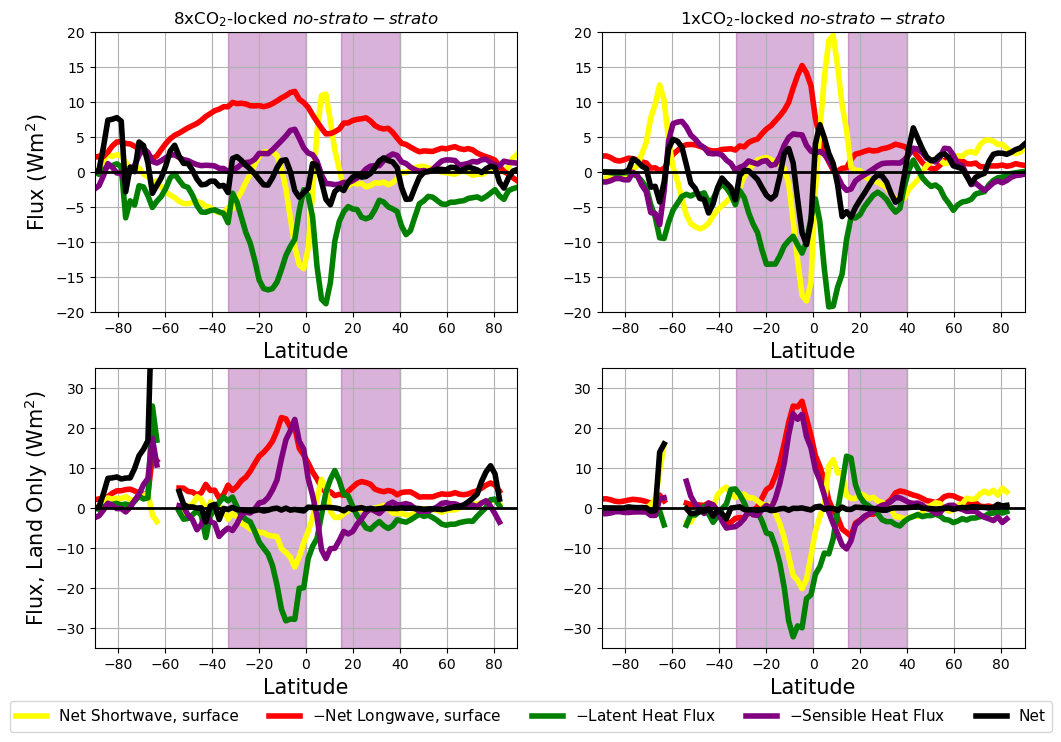

In [6]:
fig, ax = plt.subplots(2,2,figsize=(12,8))#, tight_layout=True)

year_to_avg = 10 # years to average 

FLNS_diff_8xco2 = yearly_avg(FLNSzonal_8xco2_nostrato,year_to_avg)-yearly_avg(FLNSzonal_8xco2_strato,year_to_avg)
FSNS_diff_8xco2 = yearly_avg(FSNSzonal_8xco2_nostrato,year_to_avg)-yearly_avg(FSNSzonal_8xco2_strato,year_to_avg)
LHFLX_diff_8xco2 = yearly_avg(LHFLXzonal_8xco2_nostrato,year_to_avg)-yearly_avg(LHFLXzonal_8xco2_strato,year_to_avg)
SHFLX_diff_8xco2 = yearly_avg(SHFLXzonal_8xco2_nostrato,year_to_avg)-yearly_avg(SHFLXzonal_8xco2_strato,year_to_avg)

ax[0,0].plot(lat, FSNS_diff_8xco2, color='yellow',linewidth = 4,label = 'Net Shortwave, surface')
ax[0,0].plot(lat, -FLNS_diff_8xco2, 'r',linewidth = 4,label = '$-$Net Longwave, surface')
ax[0,0].plot(lat, -LHFLX_diff_8xco2, 'g',linewidth = 4,label = '$-$Latent Heat Flux')
ax[0,0].plot(lat, -SHFLX_diff_8xco2, color='purple',linewidth = 4,label = '$-$Sensible Heat Flux')
ax[0,0].plot(lat, FSNS_diff_8xco2-FLNS_diff_8xco2-LHFLX_diff_8xco2-SHFLX_diff_8xco2, 'k',linewidth = 4,label = 'Net')


ax[0,0].grid()
ax[0,0].set_ylabel('Flux (Wm$^{2}$)', fontsize=15)
ax[0,0].set_xlabel('Latitude', fontsize=15)
#ax[0].set_ylim(-5,5)
ax[0,0].set_xlim(-90,90)
ax[0,0].axhline(y=0, color = 'k', linewidth=2)

# ax[0].text(-75, 3.75, '$\\overline{\Delta T_s}$ = ' + str(np.round(mean_diff_8xco2_strato,2)), color = 'b', fontsize = 13)
# ax[0].text(-75, 3.02, '$\\overline{\Delta T_s}$ = ' + str(np.round(mean_diff_8xco2_nostrato,2)), color = 'r', fontsize = 13)

ax[0,0].axvspan(-33,0, alpha = 0.3, color = 'purple')
ax[0,0].axvspan(15,40, alpha = 0.3, color = 'purple')


FLNS_diff_8xco2_land =np.nanmean(yearly_avg(FLNS_8xco2_nostrato*LANDMASK,year_to_avg),axis=-1)-np.nanmean(yearly_avg(FLNS_8xco2_strato*LANDMASK,year_to_avg), axis = -1) # difference only over land
FSNS_diff_8xco2_land =np.nanmean(yearly_avg(FSNS_8xco2_nostrato*LANDMASK,year_to_avg),axis=-1)-np.nanmean(yearly_avg(FSNS_8xco2_strato*LANDMASK,year_to_avg), axis = -1) # difference only over land
SHFLX_diff_8xco2_land =np.nanmean(yearly_avg(SHFLX_8xco2_nostrato*LANDMASK,year_to_avg),axis=-1)-np.nanmean(yearly_avg(SHFLX_8xco2_strato*LANDMASK,year_to_avg), axis = -1) # difference only over land
LHFLX_diff_8xco2_land =np.nanmean(yearly_avg(LHFLX_8xco2_nostrato*LANDMASK,year_to_avg),axis=-1)-np.nanmean(yearly_avg(LHFLX_8xco2_strato*LANDMASK,year_to_avg), axis = -1) # difference only over land





ax[1,0].plot(lat, -FLNS_diff_8xco2_land, 'r',linewidth = 4,label = 'FLNS')
ax[1,0].plot(lat, FSNS_diff_8xco2_land, color='yellow',linewidth = 4,label = 'FSNS')
ax[1,0].plot(lat, -LHFLX_diff_8xco2_land, 'g',linewidth = 4,label = 'LHFLX')
ax[1,0].plot(lat, -SHFLX_diff_8xco2_land, color='purple',linewidth = 4,label = 'SHFLX')
ax[1,0].plot(lat, FSNS_diff_8xco2_land-FLNS_diff_8xco2_land-LHFLX_diff_8xco2_land-SHFLX_diff_8xco2_land, 'k',linewidth = 4,label = 'Net')

#ax[0,1].legend(fontsize=11, loc = 'upper right')
ax[1,0].grid()
ax[1,0].set_ylabel('Flux, Land Only (Wm$^{2}$)', fontsize=15)
ax[1,0].set_xlabel('Latitude', fontsize=15)
#ax[0].set_ylim(-5,5)
ax[1,0].set_xlim(-90,90)
ax[1,0].axhline(y=0, color = 'k', linewidth=2)

# ax[0].text(-75, 3.75, '$\\overline{\Delta T_s}$ = ' + str(np.round(mean_diff_8xco2_strato,2)), color = 'b', fontsize = 13)
# ax[0].text(-75, 3.02, '$\\overline{\Delta T_s}$ = ' + str(np.round(mean_diff_8xco2_nostrato,2)), color = 'r', fontsize = 13)

ax[1,0].axvspan(-33,0, alpha = 0.3, color = 'purple')
ax[1,0].axvspan(15,40, alpha = 0.3, color = 'purple')

ax[0,0].set_title('8xCO$_2$-locked $\\it{no}$-$\\it{strato} - \\it{strato}$')

FLNS_diff_1xco2 = yearly_avg(FLNSzonal_1xco2_nostrato,year_to_avg)-yearly_avg(FLNSzonal_1xco2_strato,year_to_avg)
FSNS_diff_1xco2 = yearly_avg(FSNSzonal_1xco2_nostrato,year_to_avg)-yearly_avg(FSNSzonal_1xco2_strato,year_to_avg)
LHFLX_diff_1xco2 = yearly_avg(LHFLXzonal_1xco2_nostrato,year_to_avg)-yearly_avg(LHFLXzonal_1xco2_strato,year_to_avg)
SHFLX_diff_1xco2 = yearly_avg(SHFLXzonal_1xco2_nostrato,year_to_avg)-yearly_avg(SHFLXzonal_1xco2_strato,year_to_avg)

ax[0,1].plot(lat, -FLNS_diff_1xco2, 'r',linewidth = 4,label = 'FLNS')
ax[0,1].plot(lat, FSNS_diff_1xco2, color='yellow',linewidth = 4,label = 'FSNS')
ax[0,1].plot(lat, -LHFLX_diff_1xco2, 'g',linewidth = 4,label = 'LHFLX')
ax[0,1].plot(lat, -SHFLX_diff_1xco2, color='purple',linewidth = 4,label = 'SHFLX')
ax[0,1].plot(lat, FSNS_diff_1xco2-FLNS_diff_1xco2-LHFLX_diff_1xco2-SHFLX_diff_1xco2, 'k',linewidth = 4,label = 'Net')

#ax[0].legend(fontsize=11, loc = 'upper right')
ax[0,1].grid()
#ax[0,1].set_ylabel('$\\Delta T_S$ (K)', fontsize=15)
ax[0,1].set_xlabel('Latitude', fontsize=15)
#ax[0].set_ylim(-5,5)
ax[0,1].set_xlim(-90,90)
ax[0,1].axhline(y=0, color = 'k', linewidth=2)
ax[0,1].set_title('1xCO$_2$-locked $\\it{no}$-$\\it{strato} - \\it{strato}$')
# ax[0].text(-75, 3.75, '$\\overline{\Delta T_s}$ = ' + str(np.round(mean_diff_1xco2_strato,2)), color = 'b', fontsize = 13)
# ax[0].text(-75, 3.02, '$\\overline{\Delta T_s}$ = ' + str(np.round(mean_diff_1xco2_nostrato,2)), color = 'r', fontsize = 13)

ax[0,1].axvspan(-33,0, alpha = 0.3, color = 'purple')
ax[0,1].axvspan(15,40, alpha = 0.3, color = 'purple')


FLNS_diff_1xco2_land =np.nanmean(yearly_avg(FLNS_1xco2_nostrato*LANDMASK,year_to_avg),axis=-1)-np.nanmean(yearly_avg(FLNS_1xco2_strato*LANDMASK,year_to_avg), axis = -1) # difference only over land
FSNS_diff_1xco2_land =np.nanmean(yearly_avg(FSNS_1xco2_nostrato*LANDMASK,year_to_avg),axis=-1)-np.nanmean(yearly_avg(FSNS_1xco2_strato*LANDMASK,year_to_avg), axis = -1) # difference only over land
SHFLX_diff_1xco2_land =np.nanmean(yearly_avg(SHFLX_1xco2_nostrato*LANDMASK,year_to_avg),axis=-1)-np.nanmean(yearly_avg(SHFLX_1xco2_strato*LANDMASK,year_to_avg), axis = -1) # difference only over land
LHFLX_diff_1xco2_land =np.nanmean(yearly_avg(LHFLX_1xco2_nostrato*LANDMASK,year_to_avg),axis=-1)-np.nanmean(yearly_avg(LHFLX_1xco2_strato*LANDMASK,year_to_avg), axis = -1) # difference only over land





ax[1,1].plot(lat, -FLNS_diff_1xco2_land, 'r',linewidth = 4,label = 'FLNS')
ax[1,1].plot(lat, FSNS_diff_1xco2_land, color='yellow',linewidth = 4,label = 'FSNS')
ax[1,1].plot(lat, -LHFLX_diff_1xco2_land, 'g',linewidth = 4,label = 'LHFLX')
ax[1,1].plot(lat, -SHFLX_diff_1xco2_land, color='purple',linewidth = 4,label = 'SHFLX')
ax[1,1].plot(lat, FSNS_diff_1xco2_land-FLNS_diff_1xco2_land-LHFLX_diff_1xco2_land-SHFLX_diff_1xco2_land, 'k',linewidth = 4,label = 'Net')

#ax[1].legend(fontsize=11, loc = 'upper right')
ax[1,1].grid()
#ax[1,1].set_ylabel('$\\Delta T_S$ (K)', fontsize=15)
ax[1,1].set_xlabel('Latitude', fontsize=15)
#ax[0].set_ylim(-5,5)
ax[1,1].set_xlim(-90,90)
ax[1,1].axhline(y=0, color = 'k', linewidth=2)

# ax[0].text(-75, 3.75, '$\\overline{\Delta T_s}$ = ' + str(np.round(mean_diff_1xco2_strato,2)), color = 'b', fontsize = 13)
# ax[0].text(-75, 3.02, '$\\overline{\Delta T_s}$ = ' + str(np.round(mean_diff_1xco2_nostrato,2)), color = 'r', fontsize = 13)

ax[1,1].axvspan(-33,0, alpha = 0.3, color = 'purple')
ax[1,1].axvspan(15,40, alpha = 0.3, color = 'purple')

ax[0,0].legend(fontsize=11, loc = (-0.2,-1.5), ncol = 5)

ax[0,0].set_ylim(-20,20)
ax[1,1].set_ylim(-35,35)

ax[0,1].set_ylim(-20,20)
ax[1,0].set_ylim(-35,35)

plt.savefig('./Figure_PDFs/Figure_S4.pdf', bbox_inches='tight')